# K- Nearest Neighbour

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
import csv

def read_csv_manual(file_path):
    X = []
    y = []
    
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            features = [float(value) for value in row[:-1]]
            label = float(row[-1]) 
            X.append(features)
            y.append(label)
    
    return X, y
file_path = 'Social_Network_Ads (1).csv' 
X, y = read_csv_manual(file_path)
X = np.array(X)
y = np.array(y)
print("Features (X):", X[:5])
print("Labels (y):", y[:5])  


Features (X): [[1.9e+01 1.9e+04]
 [3.5e+01 2.0e+04]
 [2.6e+01 4.3e+04]
 [2.7e+01 5.7e+04]
 [1.9e+01 7.6e+04]]
Labels (y): [0. 0. 0. 0. 0.]


In [20]:
import random
def train_test_split_manual(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        random.seed(random_state)  
    combined = list(zip(X, y))
    random.shuffle(combined)
    X, y = zip(*combined)
    
    X = list(X)
    y = list(y)
    split_index = int(len(X) * (1 - test_size))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    
    return X_train, X_test, y_train, y_test
file_path = 'Social_Network_Ads (1).csv'  
X, y = read_csv_manual(file_path)
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.25, random_state=0)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 300
Testing set size: 100


In [21]:
print(X_train)

[[26.0, 15000.0], [48.0, 33000.0], [27.0, 84000.0], [19.0, 76000.0], [24.0, 58000.0], [23.0, 66000.0], [33.0, 28000.0], [46.0, 117000.0], [31.0, 66000.0], [50.0, 36000.0], [29.0, 43000.0], [19.0, 26000.0], [22.0, 63000.0], [36.0, 60000.0], [31.0, 18000.0], [35.0, 73000.0], [41.0, 79000.0], [25.0, 22000.0], [41.0, 72000.0], [48.0, 41000.0], [37.0, 79000.0], [35.0, 71000.0], [37.0, 80000.0], [48.0, 96000.0], [57.0, 122000.0], [40.0, 57000.0], [26.0, 84000.0], [31.0, 68000.0], [46.0, 22000.0], [60.0, 102000.0], [44.0, 139000.0], [54.0, 108000.0], [37.0, 57000.0], [38.0, 61000.0], [27.0, 58000.0], [46.0, 74000.0], [51.0, 134000.0], [36.0, 50000.0], [39.0, 42000.0], [39.0, 61000.0], [40.0, 71000.0], [37.0, 93000.0], [45.0, 45000.0], [28.0, 59000.0], [55.0, 39000.0], [26.0, 16000.0], [35.0, 75000.0], [43.0, 133000.0], [48.0, 74000.0], [27.0, 96000.0], [34.0, 43000.0], [47.0, 49000.0], [45.0, 131000.0], [46.0, 41000.0], [57.0, 33000.0], [40.0, 57000.0], [48.0, 138000.0], [48.0, 90000.0], [42.

In [22]:
print(y_train)

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,

In [23]:
print(X_test)

[[24.0, 19000.0], [23.0, 20000.0], [35.0, 27000.0], [56.0, 104000.0], [54.0, 70000.0], [47.0, 25000.0], [35.0, 44000.0], [35.0, 25000.0], [29.0, 83000.0], [29.0, 61000.0], [35.0, 53000.0], [35.0, 57000.0], [37.0, 33000.0], [49.0, 36000.0], [42.0, 54000.0], [57.0, 60000.0], [56.0, 133000.0], [41.0, 30000.0], [58.0, 38000.0], [48.0, 131000.0], [42.0, 53000.0], [41.0, 87000.0], [38.0, 71000.0], [41.0, 63000.0], [36.0, 99000.0], [32.0, 120000.0], [20.0, 74000.0], [43.0, 129000.0], [40.0, 47000.0], [24.0, 55000.0], [44.0, 39000.0], [35.0, 77000.0], [35.0, 38000.0], [33.0, 51000.0], [25.0, 79000.0], [42.0, 80000.0], [52.0, 38000.0], [20.0, 23000.0], [40.0, 75000.0], [37.0, 55000.0], [39.0, 134000.0], [28.0, 123000.0], [21.0, 16000.0], [22.0, 55000.0], [41.0, 51000.0], [21.0, 88000.0], [48.0, 134000.0], [49.0, 141000.0], [19.0, 19000.0], [52.0, 138000.0], [38.0, 65000.0], [58.0, 101000.0], [27.0, 54000.0], [32.0, 150000.0], [59.0, 88000.0], [27.0, 137000.0], [21.0, 68000.0], [40.0, 75000.0], 

In [24]:
print(X_test)

[[24.0, 19000.0], [23.0, 20000.0], [35.0, 27000.0], [56.0, 104000.0], [54.0, 70000.0], [47.0, 25000.0], [35.0, 44000.0], [35.0, 25000.0], [29.0, 83000.0], [29.0, 61000.0], [35.0, 53000.0], [35.0, 57000.0], [37.0, 33000.0], [49.0, 36000.0], [42.0, 54000.0], [57.0, 60000.0], [56.0, 133000.0], [41.0, 30000.0], [58.0, 38000.0], [48.0, 131000.0], [42.0, 53000.0], [41.0, 87000.0], [38.0, 71000.0], [41.0, 63000.0], [36.0, 99000.0], [32.0, 120000.0], [20.0, 74000.0], [43.0, 129000.0], [40.0, 47000.0], [24.0, 55000.0], [44.0, 39000.0], [35.0, 77000.0], [35.0, 38000.0], [33.0, 51000.0], [25.0, 79000.0], [42.0, 80000.0], [52.0, 38000.0], [20.0, 23000.0], [40.0, 75000.0], [37.0, 55000.0], [39.0, 134000.0], [28.0, 123000.0], [21.0, 16000.0], [22.0, 55000.0], [41.0, 51000.0], [21.0, 88000.0], [48.0, 134000.0], [49.0, 141000.0], [19.0, 19000.0], [52.0, 138000.0], [38.0, 65000.0], [58.0, 101000.0], [27.0, 54000.0], [32.0, 150000.0], [59.0, 88000.0], [27.0, 137000.0], [21.0, 68000.0], [40.0, 75000.0], 

In [29]:
import numpy as np
from collections import Counter
def euclidean_distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.sqrt(np.sum((x1 - x2) ** 2))
class SimpleKNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [euclidean_distance(test_point, x_train) for x_train in self.X_train]
        
            k_indices = np.argsort(distances)[:self.n_neighbors]
            
            k_nearest_labels = [self.y_train[i] for i in k_indices]
     
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        
        return predictions
classifier = SimpleKNN(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Predicted labels:", y_pred)


Predicted labels: [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [30]:
import numpy as np
from collections import Counter
def euclidean_distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.sqrt(np.sum((x1 - x2) ** 2))
class SimpleKNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.X_min = np.min(X_train, axis=0)  
        self.X_max = np.max(X_train, axis=0)  
    def scale(self, X):
        return (X - self.X_min) / (self.X_max - self.X_min)
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:     
            distances = [euclidean_distance(test_point, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.n_neighbors]     
            k_nearest_labels = [self.y_train[i] for i in k_indices]    
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        
        return predictions
classifier = SimpleKNN(n_neighbors=5)
classifier.fit(X_train, y_train)
new_input = [[30, 87000]] 
new_input_scaled = classifier.scale(new_input)
prediction = classifier.predict(new_input_scaled)
print("Predicted class for [30, 87000]:", prediction)


Predicted class for [30, 87000]: [0.0]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49 10]
 [10 31]]


0.8

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10764\338002537.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


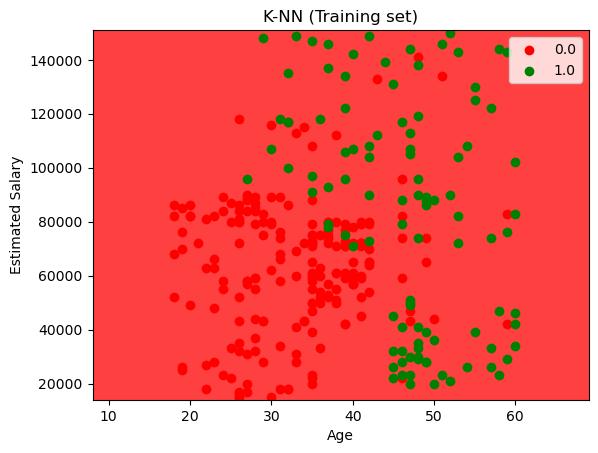

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()